## AGENDA
1. how many sentences ended with "\\"? (15+%)
2. how many sentences have "\< unk \>" / _UNK? (15+%)
3. most frequent first word/ first two words? (1-gram: high peak, 2-gram: flatter, 3-gram: even flatter)
4. easy way to inspect caption + image? (done)

In [47]:
import os
import re
import json
from collections import Counter, defaultdict

import nltk
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

from utils import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
MID_JSON = './ig_json/mid.json'
IMG_DIR = '../../data/instagram/images'
WORD_MAP  = './meta_wstyle/data_mid/WORDMAP_flickr8k_1_cap_per_img_5_min_word_freq.json'

json_data = read_json(MID_JSON)
word_map = read_json(WORD_MAP)

print('data size: ', len(json_data['images']))

data size:  121200


In [21]:
tup_data = []
for img_dict in json_data['images']:
    tokens = img_dict['sentences'][0]['tokens']
    tup = (tokens, img_dict['split'], img_dict['filename'])
    tup_data.append(tup)
    
assert len(tup_data) == len(json_data['images'])

In [73]:
def plot_one_sample(tokens, img_fn):
    caption = ' '.join(tokens)
    img = Image.open(os.path.join(IMG_DIR, img_fn))
    fig, ax = plt.subplots(figsize = (8, 8))
    ax.imshow(img)
    ax.set_title(caption)

In [97]:
def plot_multi_samples(counter, split, k):
    fig, axs = plt.subplots(int(k/2), int(k/2), figsize = (10, 10))
    axs = axs.flatten()
    
    idxs = np.random.choice(len(counter[split]), k)
    for i, idx in enumerate(idxs):
        tup = counter[split][idx]
        tokens, img_fn = tup[0], tup[2]
        caption = ' '.join(tokens)
        img = Image.open(os.path.join(IMG_DIR, img_fn))
        axs[i].imshow(img)
        axs[i].set_title(caption)
    plt.tight_layout()

In [90]:
def search_pattern(tup_data, pattern):
    counter = defaultdict(list)
    for tokens, split, fn in tup_data:
        if pattern in tokens:
            tup = (tokens, split, fn)
            counter[split].append(tup)
    return counter

### Q1. How many sentences end with "\\"?

In [94]:
counter = search_pattern(tup_data, pattern = '\\')

for k, ls in counter.items():
    print(f'{k}: {len(ls)}')

train: 20314
val: 227
test: 43


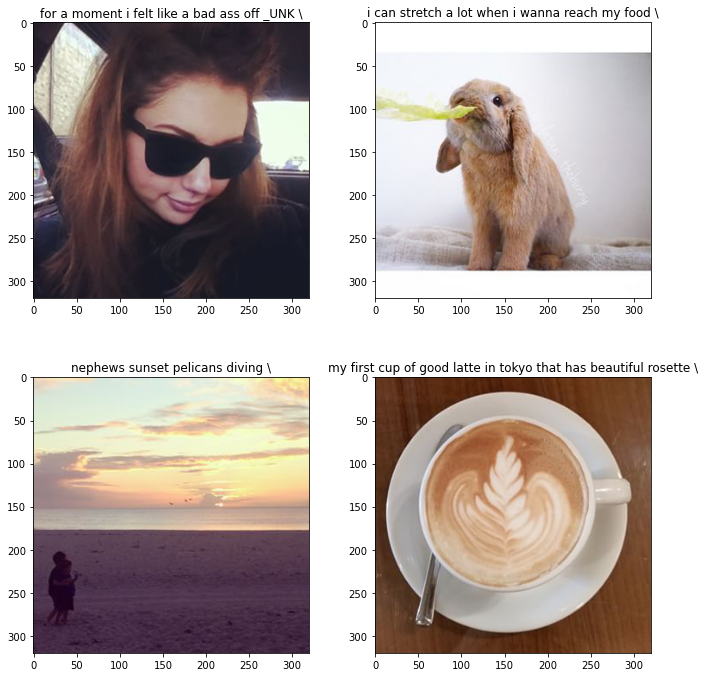

In [98]:
plot_multi_samples(counter, split = 'train', k = 4)

### Q2: How many _UNK?

In [103]:
counter = search_pattern(tup_data, pattern = '_UNK')

for k, ls in counter.items():
    print(f'{k}: {len(ls)}')

train: 18810
val: 151
test: 33


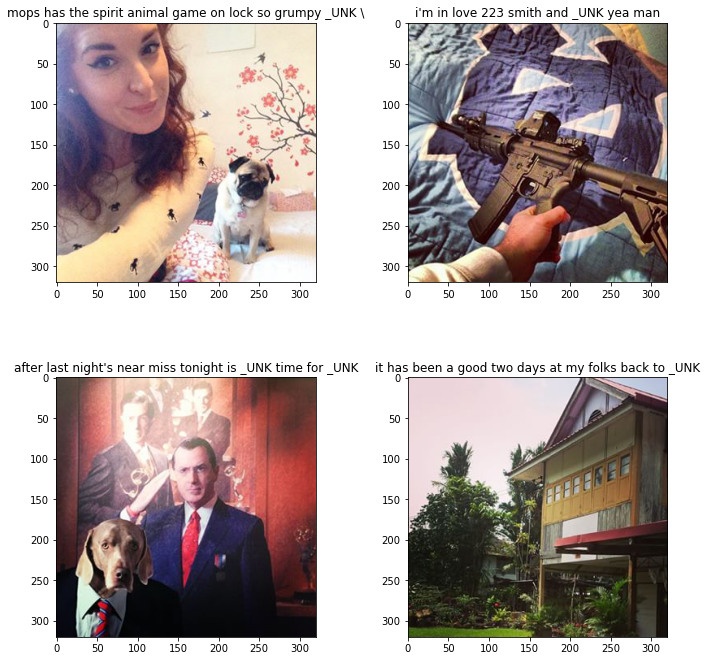

In [106]:
plot_multi_samples(counter, split = 'train', k = 4)

### Q3: Most frequent first word/ first two words?

In [137]:
def show_ngram_freq(tup_data, n = 1, top_k = 10, verbose = True):
    ngram_counter = Counter()
    for tokens, _, _ in tup_data:
        ngram = tuple(tokens[:n])
        ngram_counter.update([ngram])

    ngram_counter = [(k, v) for k, v in ngram_counter.items()]
    ngram_counter = sorted(ngram_counter, key = lambda x: x[1], reverse = True)
    
    outs = []
    for i, (ngram, freq) in enumerate(ngram_counter):
        if i == top_k:
            break
        if verbose:
            print(f'{ngram} ({freq})')
        outs.append((ngram, freq))
    return outs

In [138]:
outs = show_ngram_freq(tup_data, n = 1, top_k = 10)

('i',) (5774)
('the',) (4409)
('my',) (4290)
('this',) (2586)
('a',) (2190)
('_UNK',) (2037)
("it's",) (1632)
('happy',) (1498)
('just',) (1293)
("i'm",) (1218)


In [139]:
outs = show_ngram_freq(tup_data, n = 2, top_k = 10)

('this', 'is') (1062)
('i', 'love') (839)
('good', 'morning') (643)
('one', 'of') (336)
('me', 'and') (336)
("it's", 'a') (328)
('a', 'little') (312)
('i', 'think') (301)
('love', 'this') (288)
('happy', 'birthday') (277)


In [140]:
outs = show_ngram_freq(tup_data, n = 3, top_k = 10)

('me', 'and', 'my') (186)
('this', 'is', 'what') (177)
('good', 'morning') (157)
('i', 'love', 'this') (145)
('one', 'of', 'my') (144)
('happy', 'birthday', 'to') (138)
('i', 'love', 'my') (126)
('this', 'is', 'how') (125)
('one', 'of', 'the') (105)
('this', 'is', 'my') (99)


### Visualization

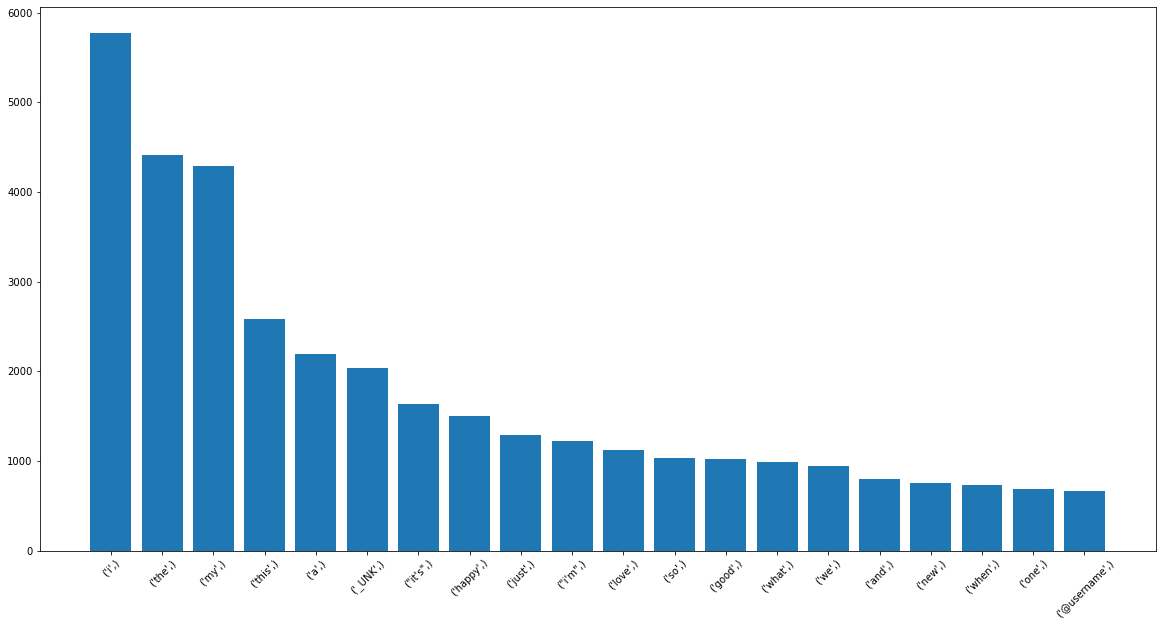

In [151]:
outs = show_ngram_freq(tup_data, n = 1, top_k = 20, verbose = False)
ngrams, freqs = zip(*outs)

plt.figure(figsize = (20,10))
plt.bar(range(len(ngrams)), freqs, align='center')
plt.xticks(range(len(ngrams)), ngrams, rotation = 45);

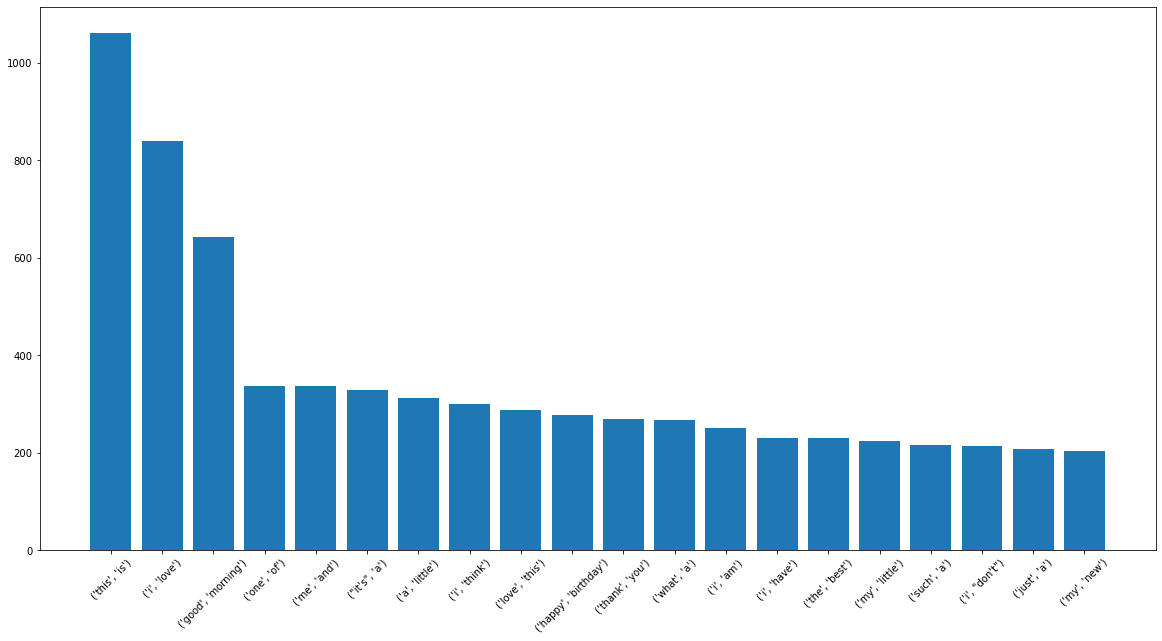

In [150]:
outs = show_ngram_freq(tup_data, n = 2, top_k = 20, verbose = False)
ngrams, freqs = zip(*outs)

plt.figure(figsize = (20,10))
plt.bar(range(len(ngrams)), freqs, align='center')
plt.xticks(range(len(ngrams)), ngrams, rotation = 45);

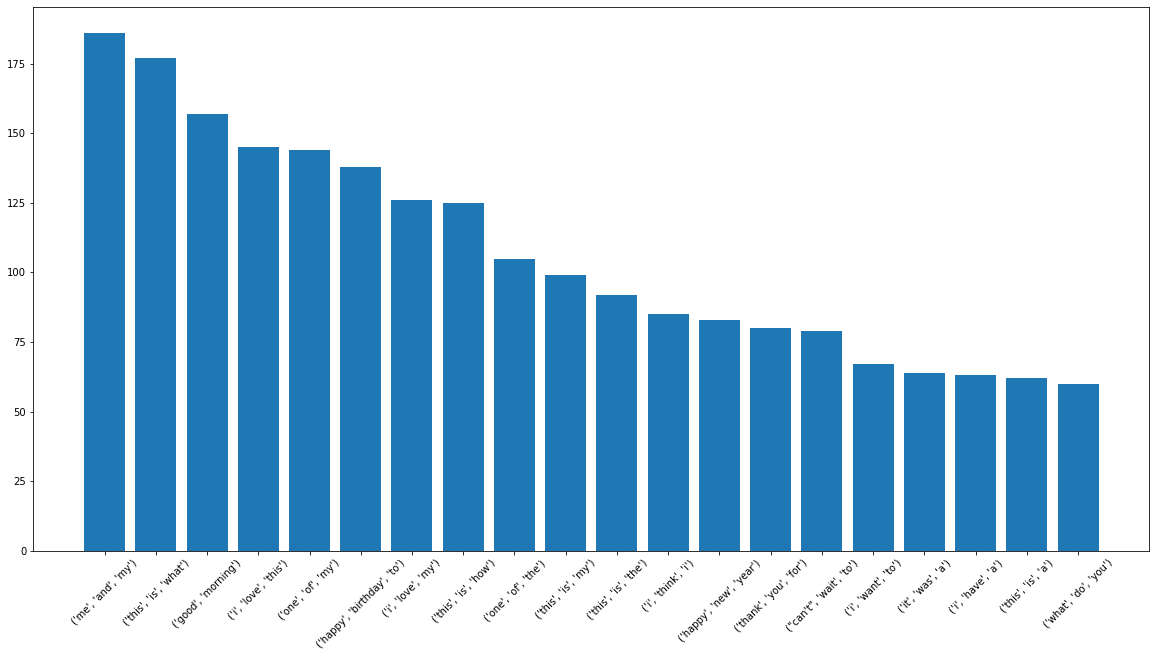

In [152]:
outs = show_ngram_freq(tup_data, n = 3, top_k = 20, verbose = False)
ngrams, freqs = zip(*outs)

plt.figure(figsize = (20,10))
plt.bar(range(len(ngrams)), freqs, align='center')
plt.xticks(range(len(ngrams)), ngrams, rotation = 45);